In [9]:

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler  
import matplotlib.pyplot as plt

import os, sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [10]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from log import get_logger
from plots import Plots

file_handler = FileHandler()
my_logger = get_logger("Prediction") 
plot = Plots()

import warnings
warnings.filterwarnings('ignore')

In [11]:
train_data = file_handler.read_csv("../data/cleaned_train.csv")
test_data = file_handler.read_csv("../data/cleaned_test.csv")

2022-05-28 06:02:42,178 — FileHandler — DEBUG — file read as csv
2022-05-28 06:02:42,309 — FileHandler — DEBUG — file read as csv


##### Label Encode Date

In [12]:
try:
    # Train with only by the opened stores and Sales greater than zero.
    
    train_data = train_data[train_data['Open'] == 1]
    train_data = train_data[train_data['Sales'] > 0.0]

    # Label encode Date in both training and testing datasets
    for dataset in (train_data, test_data):
        encoder = preprocessing.LabelEncoder()
        dataset['Date'] = encoder.fit_transform(dataset['Date'])

    my_logger.debug('Date is encoded successfully.')
            
except Exception as e:
    my_logger.exception(f'Exception occured in Date encoding!, {e}')


2022-05-28 06:02:42,884 — Prediction — DEBUG — Date is encoded successfully.
2022-05-28 06:02:42,884 — Prediction — DEBUG — Date is encoded successfully.


#### Scaling the Data

In [13]:
scaler = MinMaxScaler()

trainining_columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',\
                    'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',\
                    'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year', 'DayOfYear', 'WeekOfYear']

testing_columns = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday','SchoolHoliday', 'StoreType', 'Assortment',\
                  'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', \
                  'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year', 'DayOfYear', 'WeekOfYear']

temp_train_data = train_data.copy()
temp_test_data = test_data.copy()   

try:
    for i in trainining_columns:
    
        # fit on training data column
        scale = scaler.fit(temp_train_data[[i]])
        
        # transform the training data column
        temp_train_data[i] = scale.transform(temp_train_data[[i]])
    
    for i in testing_columns:
    
        # fit on training data column
        scale = scaler.fit(temp_test_data[[i]])
        
        # transform the training data column
        temp_test_data[i] = scale.transform(temp_test_data[[i]]) 
    
    my_logger.debug('Data is Normalized successfully.')
    
except Exception as e:
    my_logger.debug(f"Exception occured while Normalizing the dataset, {e}")

2022-05-28 06:02:46,424 — Prediction — DEBUG — Data is Normalized successfully.
2022-05-28 06:02:46,424 — Prediction — DEBUG — Data is Normalized successfully.


In [14]:
temp_train_data.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
count,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000,844338.000
mean,0.500,0.420,0.494,0.486,0.493,0.000,0.446,0.000,0.194,0.402,0.468,0.288,0.386,0.893,0.499,0.232,0.893,0.269,0.495,0.441,0.416,0.443,0.444
std,0.289,0.287,0.292,0.197,0.203,0.000,0.497,0.016,0.395,0.454,0.497,0.323,0.357,0.087,0.500,0.306,0.087,0.327,0.289,0.302,0.389,0.278,0.282
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.167,0.241,0.344,0.346,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.000,0.783,0.000,0.000,0.783,0.000,0.233,0.182,0.000,0.203,0.196
50%,0.500,0.333,0.482,0.452,0.452,0.000,0.000,0.000,0.000,0.000,0.000,0.143,0.273,0.922,0.000,0.000,0.922,0.000,0.500,0.455,0.500,0.420,0.431
75%,0.750,0.667,0.753,0.594,0.599,0.000,1.000,0.000,0.000,1.000,1.000,0.426,0.727,0.965,1.000,0.440,0.965,0.333,0.733,0.636,0.500,0.659,0.667
max,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<AxesSubplot:xlabel='Date', ylabel='Sales'>

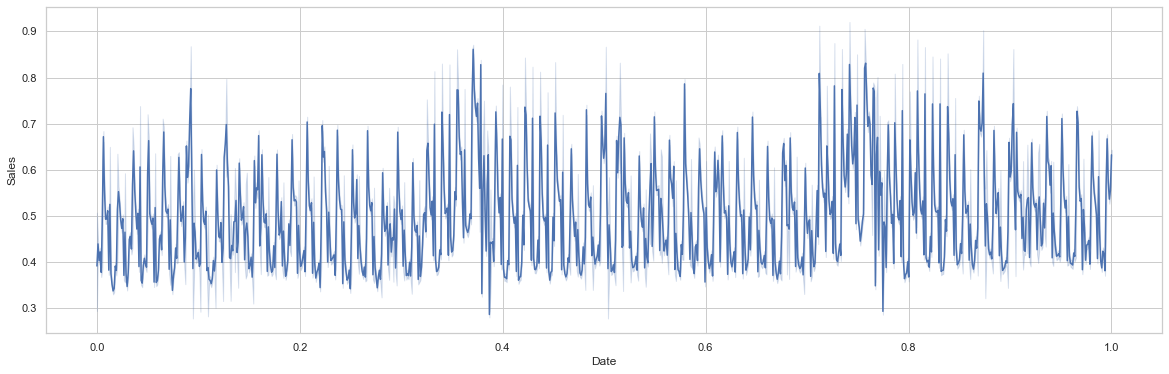

In [15]:
# Using Scaled Units
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
sns.lineplot(x='Date',y='Sales',data=temp_train_data)

In [16]:
# sample_train = temp_train_data.sample(10000)

y_target = temp_train_data.Sales
x_features =  temp_train_data.drop(columns=['Sales', 'Customers'], axis=1)

In [17]:
# Fitting Random Forest Regression to the dataset

try: 
    x_train, x_train_test, y_train, y_train_test = train_test_split(x_features, y_target, test_size=0.20, random_state=15)
    my_logger.info("Train Test split done successfully.")

except Exception as e:
    print(e)
    my_logger.debug(f"Exception occured in separating dataset into x & y_training dataset, {e}")

2022-05-28 06:03:13,670 — Prediction — INFO — Train Test split done successfully.
2022-05-28 06:03:13,670 — Prediction — INFO — Train Test split done successfully.


In [18]:
x_train.shape

(675470, 21)

#### Model the Data using Random Forest Classifier

In [19]:
#training using cross validation set
regressor_validation=RandomForestRegressor(n_estimators=128, 
                             criterion='mse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0,  
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, 
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)
try:
    rf_model_test=regressor_validation.fit(x_train,y_train)

except Exception as e:
    my_logger(f"Model fitting failed to complete, {e}")

In [20]:
try:
    print("RandomForestRegressor Test Accuracy: {}".format(rf_model_test.score(x_train_test, y_train_test)))

except Exception as e:
    my_logger.exception(f"Exception occured computing the model score, {e}")

RandomForestRegressor Test Accuracy: 0.8689543449166713


##### Use the Model to Predict Testign Dataset

In [21]:
Y_pred = rf_model_test.predict(x_train_test)   

(array([  900.,  7370., 23695., 39345., 38017., 27147., 14219.,  8046.,
         4702.,  5427.]),
 array([0.05133286, 0.14619957, 0.24106629, 0.335933  , 0.43079972,
        0.52566643, 0.62053314, 0.71539986, 0.81026657, 0.90513329,
        1.        ]),
 <BarContainer object of 10 artists>)

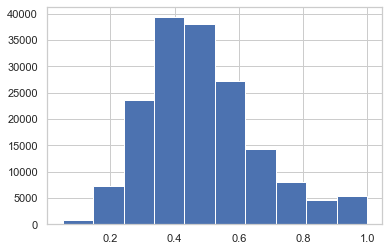

In [22]:
plt.hist(Y_pred)

#### Loss Function

In [23]:
def rmspe(y, y_pred):
    rmspe = np.sqrt(np.mean( (y - y_pred)**2 ))
    return rmspe

error=rmspe(y_train_test,Y_pred)
error

0.07127506649551725

#### Feature Importance

In [24]:
def plot_feature_importance(importance,names,model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

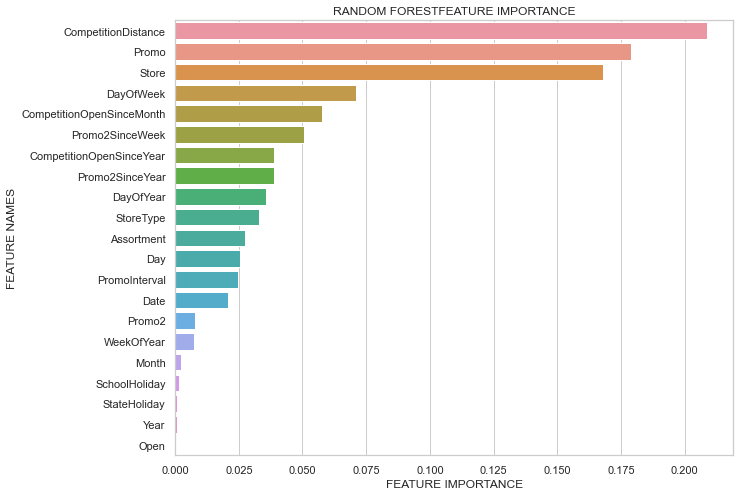

In [25]:
plot_feature_importance(regressor_validation.feature_importances_,x_train.columns,'RANDOM FOREST')

#### Summary of Feature Importance

- CompititionDistance: This feature contributes alot for Sales. This explains what happens to Sales when the compitition distance become higher or not.
- Promo: Promotion contributes a lot to Sales, where making more promotion in turn attracts more customers
- DayOfWeek: the type of days of week is also another major Sale determining feature. For instance, as shown in our EDA the Sales was very smaller on sunday.
- Other features such as, CompitionOpenedSinceMonth, CompitionSinceWeek, PromoSinceWeek, CompitionSinceYear plays a great role in deciding the Sales.


#### Save the Model

In [27]:
# model saved in timestamp format
# Getting the current timestamp 
from time import gmtime, strftime

time = strftime("%Y-%m-%d", gmtime())
filename = time + ' RandomForestModel.pkl'
pickle.dump(regressor_validation, open('../models/'+filename, 'wb')) 